# Домашнее задание 3. Свёрточные и рекуррентные нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача генерации</th>
            <th colspan=5>Задача классификации</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th style="background-color:red; color:white">C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td style="background-color:red; color:white">L</td>
            <td>6</td>
            <td>7</td>
            <td style="background-color:red; color:white">8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача классификации картинок**

A. [Набор данных "Fashion MNIST"](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) `torchvision.datasets.FashionMNIST train=True и False`

B. [Набор данных "Текстуры"](https://pytorch.org/vision/main/generated/torchvision.datasets.DTD.html#torchvision.datasets.DTD) `torchvision.datasets.DTD split='train' и 'test'`

C. **[Набор данных "Буквы"](https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST)** `torchvision.datasets.EMNIST split=letters train=True и False`

D. [Набор данных "Кошки и собаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.OxfordIIITPet.html) `torchvision.datasets.OxfordIIITPet split = 'trainval' и 'test'` (объекты разбиты по породам (всего 37 пород), нужно построить бинарный классификатор собак и кошек)

E. [Набор данных "Дорожные знаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.GTSRB.html) `torchvision.datasets.GTSRB split = 'train' и 'test'`


---

**Задача генерации текстов**

K. [Набор данных "Евгений Онегин"]() `onegin.txt`

L. **[Набор данных "Война и Мир"]() `war_and_piece.txt`**

M. [Набор данных "Стихи"]() `stihi.csv`

N. [Набор данных "Сказки"]() `fairytales.txt`

O. [Набор данных "Новости"]() `news.txt` или https://github.com/yutkin/Lenta.Ru-News-Dataset/releases

# 0. Инициализация библиотек

In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
from torch import optim
from os.path import exists
import kornia.augmentation as K
import matplotlib.pyplot as plt
from torchinfo import summary
import torchvision.transforms as transforms

Подсказка по разделению пород на два класса
```
import torchvision

# Все классы
len(torchvision.datasets.OxfordIIITPet(root='data_train', download=True).classes)

# кошки
cats = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Egyptian Mau', 'Maine Coon', 'Persian', 'Ragdoll', 'Russian Blue', 'Siamese', 'Sphynx']

# собаки
dogs = ['American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Boxer', 'Chihuahua', 'English Cocker Spaniel', 'English Setter', 'German Shorthaired', 'Great Pyrenees',
        'Havanese', 'Japanese Chin', 'Keeshond', 'Leonberger', 'Miniature Pinscher', 'Newfoundland', 'Pomeranian', 'Pug', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu',
        'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier']
```

# 1. Свёрточная нейронная сеть для классификации изображений (9 баллов)

## 1.1 Загрузка данных, разделение на train и test

Загрузите данные при помощи torchvision.datasets. Можете предусмотреть опредлённые транфсофрмации картинки, например, изменение размера до 128 px, кроп по центру в 196 px и преобразование к классу torch.Tensor:

```
import torchvision


transform = torchvision.transforms.Compose([
    # resize
    torchvision.transforms.Resize(128),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.ToTensor()
])
```

In [2]:
transform = transforms.Compose([
	transforms.Resize(24),
	transforms.CenterCrop(32),
	transforms.ToTensor()
])

In [4]:
data_train = torchvision.datasets.EMNIST(
	root = './data/letters/', 
	split = "letters", 
	train = True, 
	download = True,
	transform = transform
)

data_test = torchvision.datasets.EMNIST(
	root = './data/letters/', 
	split = "letters", 
	train = False, 
	download = True,
	transform = transform
)

In [21]:
nbatch = 16
trainset = torch.utils.data.DataLoader(
	data_train, 
	batch_size = nbatch, 
	shuffle = True,
	num_workers=2
)
testset = torch.utils.data.DataLoader(
	data_test, 
	batch_size = nbatch, 
	shuffle = False,
	num_workers=2
) 

y u d m w u r m f k k k p l y n


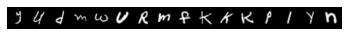

In [6]:
def imshow(img):
    npimg = img.numpy()
    plt.axis("off")
    npimg = np.transpose(npimg,(2, 1, 0))
    plt.imshow(npimg)
    plt.show
    
dataiter = iter(trainset)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow = 1))

print(" ".join(str(data_train.classes[labels[j]]) for j in range(nbatch)))

## 1.2 Предобработка данных (по необходимости)

## 1.3 Инициализация объекта свёрточной нейронной сети

Создайте нейронную сеть с 2-4 свёрточными слоями. В остальном конфигурация сети может быть произвольной. 

In [7]:
class EmptyLayer(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return x

In [8]:
class CNN(nn.Module):
	def __init__(self, regularization:dict = None):
		super(CNN, self).__init__()
		self.conv1 = nn.Sequential(
			nn.Conv2d(
				in_channels = 1, 
				out_channels = 32, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				32, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			),
		)
		self.conv2 = nn.Sequential(
			nn.Conv2d(
				in_channels = 32, 
				out_channels = 64, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				64, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			),
		)
		self.conv3 = nn.Sequential(
			nn.Conv2d(
				in_channels = 64, 
				out_channels = 128, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			nn.ReLU(),
			nn.Conv2d(
				in_channels = 128, 
				out_channels = 256, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				256, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			),
		)
		self.out = nn.Sequential(
			nn.Linear(256 * 4 * 4, 1024),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.Dropout(p = regularization['p']),
			nn.Linear(1024, 512),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.Dropout(p = regularization['p']),
			nn.Linear(512, 27),
		)
			
	def forward(self, x):
		x = self.conv1(x)
		x = self.conv2(x)
		x = self.conv3(x)
		# flatten the output of conv2 to (batch_size, 32 * 7 * 7)
		x = x.view(x.size(0), -1)       
		output = self.out(x)
		return output, x    # return x for visualization		
		


In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [16]:
cnn = CNN().to(device)
summary(cnn, input_size = (nbatch, 1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [16, 27]                  --
├─Sequential: 1-1                        [16, 32, 16, 16]          --
│    └─Conv2d: 2-1                       [16, 32, 32, 32]          320
│    └─ReLU: 2-2                         [16, 32, 32, 32]          --
│    └─EmptyLayer: 2-3                   [16, 32, 32, 32]          --
│    └─MaxPool2d: 2-4                    [16, 32, 16, 16]          --
├─Sequential: 1-2                        [16, 64, 8, 8]            --
│    └─Conv2d: 2-5                       [16, 64, 16, 16]          18,496
│    └─ReLU: 2-6                         [16, 64, 16, 16]          --
│    └─EmptyLayer: 2-7                   [16, 64, 16, 16]          --
│    └─MaxPool2d: 2-8                    [16, 64, 8, 8]            --
├─Sequential: 1-3                        [16, 256, 4, 4]           --
│    └─Conv2d: 2-9                       [16, 128, 8, 8]           73,856
│    └

## 1.4 Обучение свёрточной нейронной сети для решения задачи классификации

In [8]:
# optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(cnn.parameters(), lr=0.0001)

In [10]:
def train( 	model: nn.Module,
			dataset:torch.utils.data.DataLoader,
			optimizer:optim.Optimizer,
			lossFunc:nn.Module = nn.CrossEntropyLoss(),
			transformation:K.AugmentationSequential = None):
	# switch model to train state
	model.train()
	# local variables
	__running_loss = 0
	__correct_pred = 0
	__total_pred = 0
	# loop on all batches in dataset
	for data in dataset:
		inputs, labels = data[0].to(device), data[1].to(device)
		if transformation is not None:
			inputs = transformation(inputs)
		# gives batch data, normalize x when iterate train_loader
		output = model(inputs)[0]         
		loss = lossFunc(output, labels)
		# clear gradients for this training step   
		optimizer.zero_grad()           
		# backpropagation, compute gradients 
		loss.backward()                # apply gradients             
		optimizer.step()   
		# 
		predicted = torch.max(output, 1)[1].data.squeeze()
		__running_loss += loss.item()
		__total_pred += labels.size(0)
		__correct_pred += predicted.eq(labels).sum().item()             
		pass
	__train_loss = __running_loss/len(dataset)
	__accuracy = 100.*__correct_pred/__total_pred
	return __train_loss, __accuracy

In [12]:
def test(	model: nn.Module,
			dataset:torch.utils.data.DataLoader,
			lossFunc:nn.Module = nn.CrossEntropyLoss()):
	# Test the model
	model.eval()
	# local variables
	__running_loss = 0
	__correct_pred = 0
	__total_pred = 0

	with torch.no_grad():
		correct = 0
		total = 0
		for data in dataset:
			inputs, labels = data[0].to(device), data[1].to(device)
			output = model(inputs)[0]

			loss = lossFunc(output,labels)
			__running_loss+=loss.item()
			
			predicted = torch.max(output, 1)[1].data.squeeze()
			__total_pred += labels.size(0)	
			__correct_pred += predicted.eq(labels).sum().item()
			pass
	pass
	__test_loss = __running_loss/len(dataset)
	__accuracy = 100.*__correct_pred/__total_pred
	return __test_loss, __accuracy

In [13]:
def trainF(	model: nn.Module,
			dataset:torch.utils.data.DataLoader,
			dumpName: str, 
			optimizer:optim.Optimizer,
			lossFunc:nn.Module = nn.CrossEntropyLoss(),
			maxEpochs: int = 100,
			transformation:K.AugmentationSequential = None,
			loadAndTrain: bool = False):
	# load previous state
	if loadAndTrain and exists(f'./model/{dumpName}.dump'):
		model.load_state_dict(torch.load(f'./model/{dumpName}.dump'))
	# train the model
	__trainLoss = []
	__trainAccuracy = []
	# loop on epochs
	print ("{:^13} {:^10} {:^10}".format('Epoch', 'Loss', 'Accuracy'))	
	for epoch in range(maxEpochs):
		__loss, __accur = train(
			model = model, 
			dataset = dataset,
			optimizer = optimizer,
			lossFunc = lossFunc,
			transformation = transformation
		)
		__trainLoss.append(__loss)
		__trainAccuracy.append(__accur)
		print ('[{:>5}/{:<5}] {:^10.4f} {:^10.4f}'.format(epoch + 1, maxEpochs, __loss, __accur))
	pass
	torch.save(model.state_dict(), f'./model/{dumpName}.dump')
	return __lossHistory, __accurHistory
	

In [14]:
def trainNtest(	model: nn.Module,
				datasets: [torch.utils.data.DataLoader],
				dumpName: str, 
				optimizer:optim.Optimizer,
				lossFunc:nn.Module = nn.CrossEntropyLoss(),
				maxEpochs: int = 100,
				transformation:K.AugmentationSequential = None,
				loadNtrain: bool = False):
	# load previous state
	if loadNtrain and exists(f'./model/{dumpName}.dump'):
		model.load_state_dict(torch.load(f'./model/{dumpName}.dump'))
	# local variables
	__trainLoss = []
	__trainAccuracy = []
	__testLoss = []
	__testAccuracy = []
	# loop on epochs
	print ("{:^13} {:^10} {:^10}".format('Epoch', 'Loss', 'Accuracy'))
	for epoch in range(maxEpochs):
		# train model 
		__loss, __accur = train(
			model = model, 
			dataset = datasets[0],
			optimizer = optimizer,
			lossFunc = lossFunc,
			transformation = transformation
		)
		__trainLoss.append(__loss)
		__trainAccuracy.append(__accur)
		print ('[{:>5}/{:<5}] {:^10.4f} {:^10.4f}'.format(epoch + 1, maxEpochs, __loss, __accur))
		# test model 
		__loss, __accur = test(
			model = model, 
			dataset = datasets[1],
			lossFunc = lossFunc
		)
		__testLoss.append(__loss)
		__testAccuracy.append(__accur)
	pass
	torch.save(model.state_dict(), f'./model/{dumpName}.dump')
	return __trainLoss, __trainAccuracy, __testLoss, __testAccuracy


In [17]:
num_epochs = 100
loadAndTrain = False
trainLoss, trainAccuracy, testLoss, testAccuracy = trainNtest(
	model = cnn,
	datasets = [trainset, testset],
	dumpName = 'cnn_1',
	optimizer = optim.Adam(cnn.parameters(), lr=0.0001),
	maxEpochs = num_epochs,
	loadNtrain = loadAndTrain
)

    Epoch        Loss     Accuracy 
[    1/100  ]   0.5874    81.2147  
[    2/100  ]   0.2474    91.6426  
[    3/100  ]   0.1950    93.1979  
[    4/100  ]   0.1648    94.1442  
[    5/100  ]   0.1433    94.7933  
[    6/100  ]   0.1271    95.2460  
[    7/100  ]   0.1134    95.6843  
[    8/100  ]   0.1015    96.0649  
[    9/100  ]   0.0922    96.3542  
[   10/100  ]   0.0836    96.5929  
[   11/100  ]   0.0774    96.7684  
[   12/100  ]   0.0724    96.9631  
[   13/100  ]   0.0676    97.0913  
[   14/100  ]   0.0635    97.2821  
[   15/100  ]   0.0600    97.3942  
[   16/100  ]   0.0567    97.5208  
[   17/100  ]   0.0548    97.6050  
[   18/100  ]   0.0528    97.6603  
[   19/100  ]   0.0496    97.8029  
[   20/100  ]   0.0487    97.8470  
[   21/100  ]   0.0472    97.8862  
[   22/100  ]   0.0450    98.0008  
[   23/100  ]   0.0440    98.0385  
[   24/100  ]   0.0422    98.1490  
[   25/100  ]   0.0411    98.1779  
[   26/100  ]   0.0402    98.2316  
[   27/100  ]   0.0389    98

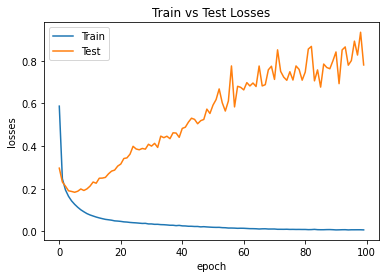

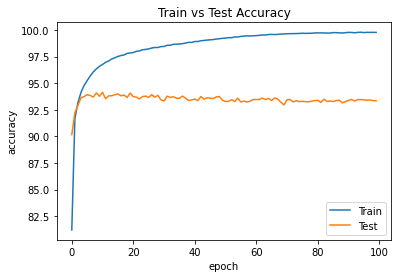

In [18]:
plt.plot(trainLoss, label='Train')
plt.plot(testLoss, label='Test')
plt.ylabel('losses')
plt.xlabel('epoch')
plt.title('Train vs Test Losses')
plt.legend()
plt.show()

plt.plot(trainAccuracy, label='Train')
plt.plot(testAccuracy, label='Test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

## 1.5 Агументация данных и регулряизация нейросети

Попобуйте добавить аугументацию (случайные повороты, увеличение, уменьшение) в данные, а также регуляризацию (Drop out и Batch Norm слои) в модель. Как меняется метрика accuracy на обучающей и тестовой выборке в процессе обучения? Постройте график.

In [15]:
randTransform = K.AugmentationSequential(
	K.RandomPerspective(),
	K.RandomAffine(degrees=(-180, 180), scale = (0.5, 1)),
	K.RandomResizedCrop((32,32), scale = (0.2, 1)),
	K.RandomCrop((32,32), padding = 4),
	K.RandomVerticalFlip(),
	K.RandomHorizontalFlip(),
	data_keys = ["Input"],
	random_apply = (1,),
	same_on_batch = False
)

b w x z x k h v v e h a o w j g


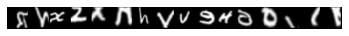

In [17]:
dataiter = iter(trainset)
images, labels = dataiter.next()
images = randTransform(images)

imshow(torchvision.utils.make_grid(images, nrow = 1))

print(" ".join(str(data_train.classes[labels[j]]) for j in range(nbatch)))

In [22]:
cnnR = CNN(
	regularization={
		'eps': 0.001,		# default 'eps': 0.00001
		'momentum': 0.1, 	# default 'momentum': 0.1
		'p': 0.5			# default 'p': 0.5
	}
)
cnnR.to(device)
summary(cnnR, (nbatch, 1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 27]                  --
├─Sequential: 1-1                        [64, 32, 16, 16]          --
│    └─Conv2d: 2-1                       [64, 32, 32, 32]          320
│    └─ReLU: 2-2                         [64, 32, 32, 32]          --
│    └─BatchNorm2d: 2-3                  [64, 32, 32, 32]          64
│    └─MaxPool2d: 2-4                    [64, 32, 16, 16]          --
├─Sequential: 1-2                        [64, 64, 8, 8]            --
│    └─Conv2d: 2-5                       [64, 64, 16, 16]          18,496
│    └─ReLU: 2-6                         [64, 64, 16, 16]          --
│    └─BatchNorm2d: 2-7                  [64, 64, 16, 16]          128
│    └─MaxPool2d: 2-8                    [64, 64, 8, 8]            --
├─Sequential: 1-3                        [64, 256, 4, 4]           --
│    └─Conv2d: 2-9                       [64, 128, 8, 8]           73,856
│    

## 1.6 Обучение нейросети на данных с аугументацией 

In [23]:
num_epochs = 100
loadAndTrain = False
trainLossR, trainAccuracyR, testLossR, testAccuracyR = trainNtest(
	model = cnnR,
	datasets = [trainset, testset],
	dumpName = 'cnn_2',
	optimizer = optim.SGD(cnnR.parameters(), lr=0.001, momentum=0.9),
	maxEpochs = num_epochs,
	loadNtrain = loadAndTrain,
	transformation = randTransform
)

    Epoch        Loss     Accuracy 
[    1/100  ]   2.3973    28.6106  
[    2/100  ]   1.6970    47.4503  
[    3/100  ]   1.5086    53.2035  
[    4/100  ]   1.3660    57.3958  
[    5/100  ]   1.2901    59.8213  
[    6/100  ]   1.2611    60.3558  
[    7/100  ]   1.2112    62.0465  
[    8/100  ]   1.2012    62.2131  
[    9/100  ]   1.1450    63.9728  
[   10/100  ]   1.1206    64.5232  
[   11/100  ]   1.0999    65.2732  
[   12/100  ]   1.0779    65.9920  
[   13/100  ]   1.0635    66.4671  
[   14/100  ]   1.0538    66.6194  
[   15/100  ]   1.0322    67.3197  
[   16/100  ]   1.0168    67.8421  
[   17/100  ]   1.0019    68.1082  
[   18/100  ]   1.0134    67.7252  
[   19/100  ]   0.9838    68.8093  
[   20/100  ]   0.9756    69.0080  
[   21/100  ]   0.9797    68.9736  
[   22/100  ]   0.9585    69.4768  
[   23/100  ]   0.9522    69.6314  
[   24/100  ]   0.9559    69.6010  
[   25/100  ]   0.9412    70.0024  
[   26/100  ]   0.9403    69.9591  
[   27/100  ]   0.9150    70

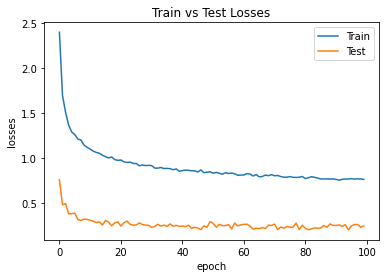

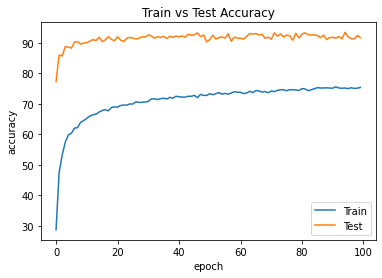

In [24]:
plt.plot(trainLossR, label='Train')
plt.plot(testLossR, label='Test')
plt.ylabel('losses')
plt.xlabel('epoch')
plt.title('Train vs Test Losses')
plt.legend()
plt.show()

plt.plot(trainAccuracyR, label='Train')
plt.plot(testAccuracyR, label='Test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

## 1.7 Выводы

> Что удалось попробовать? Что получилось, а что — нет? Повлияло ли добавление аугументации на качество?

В ходе выполения задания была создана структура свёрточной нейронной сети, основой которой послужила AlexNet. Обучение моделей нейронных сетей дало результаты, представленные на графиках ниже. Регуляриязация должна была привести к тому, что увеличивается точноть классификации, что в совокупности с аугментацией тренировочных датасетов давало бы преимущество, однако, как показывают графики точности, свёрточная нейронная сеть без регуляризации оказалась чуть лучше, при этом графики loss показывают, что аугментация данных давала преимущество свёрточной нейронной сети с регуляризацией на тестовой выборке. Вероятнее всего, точноть могла быть выше, если бы использовались датасеты, состоящие из пакетов длиной равной тем, что использовались при обучении свёрточной нейронной сети без регуляризации, однако обучение такой модели по подсчётам могло занять порядка 20 часов.

<table bgcolor="white" align="center">
	<tr bgcolor="black" align="center" style="color:white">
		<td></td>
		<td> Without regularization </td>
		<td> With regularization </td>
	</tr>
	<tr>
		<td bgcolor="black" align="center" style="color:white">
			Loss
		</td>
		<td>
			<img src="./data/plots/loss1.png" alt="Loss CNN without regularization">
		</td>
		<td>
			<img src="./data/plots/loss2.png" alt="Loss CNN with regularization">
		</td>
	</tr>
	<tr>
		<td bgcolor="black" align="center" style="color:white">
			Accuracy
		</td>
		<td>
			<img src="./data/plots/accur1.png" alt="Loss CNN without regularization">
		</td>
		<td>
			<img src="./data/plots/accur2.png" alt="Loss CNN with regularization">
		</td>
	</tr>
</table>

# 2. Рекуррентная нейронная сеть для генерации текстов (9 баллов)

## 2.0 Инициализация бибилиотек и перемнных

In [1]:
import nltk
import torch
import string
import time, math
import numpy as np
import pandas as pd
import torch.nn as nn
from torch import optim
from os.path import exists
from torchinfo import summary
from collections import Counter
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device.type}')

Using device: cuda


## 2.1 Загрузка данных



In [8]:
filename = "./data/war_and_piece.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
print(raw_text[:500])

 * ЧАСТЬ ПЕРВАЯ * 
    
I

       В  Петербурге  в  это  время  в  высших  кругах,  с  большим жаром  чем
  когда-нибудь,  шла   сложная  борьба   партий  Румянцева,  французов,  Марии
  Феодоровны,  цесаревича  и  других,   заглушаемая,  как  всегда,   трубением
  придворных трутней. Но  спокойная, роскошная, озабоченная только призраками,
  отражениями  жизни, петербургская жизнь  шла по-старому;  и из-за хода  этой
  жизни  надо  было  делать  большие усилия,  чтобы сознавать  опасность  и то


In [9]:
sentences = nltk.sent_tokenize(raw_text)
df = pd.DataFrame(sentences, columns=['Sentence'])
df.to_csv('./data/text.csv') 

## 2.2 Преодбработка/нормализация данных по необходимости

Например, можно привести все слова к нижнему регистру

In [10]:
stop = set(nltk.corpus.stopwords.words('russian'))
exclude = set(string.punctuation) 
lemma = nltk.stem.wordnet.WordNetLemmatizer()
def clean(doc):
        stop_free = " ".join([i for i in doc.split() if i not in stop])
        punc_free = "".join(ch for ch in stop_free if ch not in exclude)
        normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
        return normalized
test_sentence = clean(raw_text).lower().split()

In [13]:
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
chunk_len=len(trigrams)
print(trigrams[:3])

[(['часть', 'первая'], 'i'), (['первая', 'i'], 'в'), (['i', 'в'], 'петербурге')]


In [14]:
vocab = set(test_sentence)
voc_len = len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [15]:
inp=[]
tar=[]
for context, target in trigrams:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        inp.append(context_idxs)
        targ = torch.tensor([word_to_ix[target]], dtype=torch.long)
        tar.append(targ)

## 2.3 Инициализация объекта рекуррентной нейронной сети

In [16]:
class RNN(nn.Module):
	def __init__(	self,
					input_size: int,
					hidden_size: int,
					output_size: int,
					n_layers: int = 1,
					dropout: float = 0.0,
					name: str = 'rnn'):
		super(RNN, self).__init__()
		self.input_size = input_size
		self.hidden_size = hidden_size
		self.output_size = output_size
		self.n_layers = n_layers
		self.name = name
		
		self.encoder = nn.Embedding(input_size, hidden_size)
		self.rnn_cell = nn.RNN(
			input_size = hidden_size*2,
			hidden_size = hidden_size,
			num_layers = n_layers,
			batch_first=True,
			bidirectional=False,
			dropout = dropout
		)
		self.decoder = nn.Linear(hidden_size, output_size)
	
	def forward(self, input, hidden):
		input = self.encoder(input.view(1, -1))
		output, hidden = self.rnn_cell(input.view(1, 1, -1), hidden)
		output = self.decoder(output.view(1, -1))
		return output, hidden

	def init_hidden(self):
		return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))
				

In [17]:
rnnM = RNN(
	input_size = voc_len, 
	hidden_size = 128, 
	output_size = voc_len, 
	n_layers = 1,
	name = 'rnn_1'
)
rnnM.to(device)
summary(rnnM)

Layer (type:depth-idx)                   Param #
RNN                                      --
├─Embedding: 1-1                         2,614,912
├─RNN: 1-2                               49,408
├─Linear: 1-3                            2,635,341
Total params: 5,299,661
Trainable params: 5,299,661
Non-trainable params: 0

## 2.4 Обучение обычной рекуррентной нейронной сети

In [11]:
def train(inp, target):
    hidden = decoder.init_hidden().cuda()
    decoder.zero_grad()
    loss = 0
    
    for c in range(chunk_len):
        output, hidden = decoder(inp[c].cuda(), hidden)
        loss += criterion(output, target[c].cuda())

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len

In [12]:
def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [18]:
loadAndTrain = False
n_epochs = 100
print_every = 1
plot_every = 1
hidden_size = 128
n_layers = 3
lr = 0.015

decoder = RNN(voc_len, hidden_size, voc_len, n_layers, name = 'rnn_1')
if loadAndTrain and exists(f'./model/{decoder.name}.dump'):
	decoder.load_state_dict(torch.load(f'./model/{decoder.name}.dump'))
decoder.to(device)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr = lr)
criterion = nn.CrossEntropyLoss()
start = time.time()
all_losses = []
loss_avg = 0

In [14]:
for epoch in range(1, n_epochs + 1):
    loss = train(inp,tar)       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 12s (1 1%) 9.9361]
 43s (2 2%) 9.7772]
 13s (3 3%) 9.0571]
 44s (4 4%) 8.8894]
 15s (5 5%) 8.5976]
 45s (6 6%) 9.6815]
 17s (7 7%) 8.3462]
 48s (8 8%) 8.2562]
 19s (9 9%) 8.0741]
 50s (10 10%) 7.8776]
 20s (11 11%) 7.6815]
 52s (12 12%) 7.4811]
 22s (13 13%) 7.2333]
 52s (14 14%) 6.9926]
 23s (15 15%) 6.7511]
 53s (16 16%) 6.4900]
 23s (17 17%) 6.2264]
 52s (18 18%) 5.9570]
 23s (19 19%) 5.6804]
 53s (20 20%) 5.4088]
 24s (21 21%) 5.1410]
 54s (22 22%) 4.8772]
 24s (23 23%) 4.6250]
 54s (24 24%) 4.3884]
 24s (25 25%) 4.1580]
 53s (26 26%) 3.9461]
 23s (27 27%) 3.7475]
 53s (28 28%) 3.5614]
 23s (29 28%) 3.5878]
 53s (30 30%) 3.5902]
 23s (31 31%) 3.4289]
 53s (32 32%) 3.2765]
 23s (33 33%) 3.1469]
 53s (34 34%) 3.0007]
 23s (35 35%) 2.8625]
 54s (36 36%) 2.7260]
 25s (37 37%) 2.5934]
 55s (38 38%) 2.4682]
 26s (39 39%) 2.3459]
 55s (40 40%) 2.2332]
 25s (41 41%) 2.1228]
 55s (42 42%) 2.0174]
 26s (43 43%) 1.9184]
 57s (44 44%) 1.8322]
 27s (45 45%) 1.7322]
 57s (46 46%) 1.6452]
 27s (

In [21]:
torch.save(decoder.state_dict(), f'./model/{decoder.name}.dump')

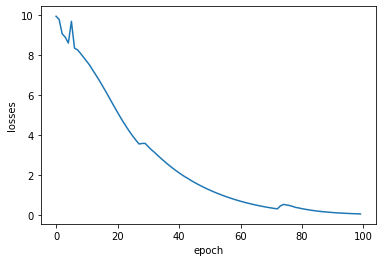

In [20]:
%matplotlib inline

plt.figure()
plt.plot(all_losses)
plt.ylabel('losses')
plt.xlabel('epoch')
plt.show()

## 2.5 Генерация текстов при помощи обычной рекуррентной сети

In [19]:
def evaluate(prime_str='this process', predict_len = 100, temperature = 0.8):
	hidden = decoder.init_hidden().cuda()

	for p in range(predict_len):
		
		prime_input = torch.tensor([word_to_ix[w] for w in prime_str.split()], dtype=torch.long).cuda()
		inp = prime_input[-2:] #last two words as input
		output, hidden = decoder(inp, hidden)
		
		# Sample from the network as a multinomial distribution
		output_dist = output.data.view(-1).div(temperature).exp()
		top_i = torch.multinomial(output_dist, 1)[0]
		
		# Add predicted word to string and use as next input
		predicted_word = list(word_to_ix.keys())[list(word_to_ix.values()).index(top_i)]
		prime_str += " " + predicted_word

	return prime_str

In [23]:
print(evaluate(
	prime_str ='в петербурге', 
	predict_len = 40, 
	temperature = 1))

в петербурге пораженный знает существеннейших крепостей николы ненужные вздохнула любовные женщиной непосильным офицерский ничтожные voler весьма удерживал сохранены сберечь брусье проложенному натянуто secours кивал нагибался встала напущенное внимательных несоразмерное спустились cosaques подчинявшей вглядываться вскакивала отправлениями подводила вшами выбирая возвращался общей девять неизвестными


In [22]:
print(evaluate(
	prime_str ='девять дней', 
	predict_len = 40, 
	temperature = 1))

девять дней озабоченность баловались громадностию булавку находившийся узнал страстное неловкость стремятся поверх выезжая глаз воет рузою делу 50 чувствовалась вреда распалась свободы рузою впечатлению неразрешимым рузою parler рузою сутуловатых ce забытый найдете представлялся ушиб различной являлась обросшие быстрых делу жесту мгновенному непрерывности


## 2.6 Обучение рекуррентной нейронной сети с LSTM-ячейками

In [24]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self,args,):
        self.args = args
        self.words = self.load_words()
        self.uniq_words = self.get_uniq_words()

        self.index_to_word = {index: word for index, word in enumerate(self.uniq_words)}
        self.word_to_index = {word: index for index, word in enumerate(self.uniq_words)}

        self.words_indexes = [self.word_to_index[w] for w in self.words]

    def load_words(self):
        train_df = pd.read_csv('./data/text.csv')
        text = train_df['Sentence'].str.cat(sep=' ')
        return text.split(' ')

    def get_uniq_words(self):
        word_counts = Counter(self.words)
        return sorted(word_counts, key=word_counts.get, reverse=True)

    def __len__(self):
        return len(self.words_indexes) - self.args['sequence_length']

    def __getitem__(self, index):
        return (
            torch.tensor(self.words_indexes[index:index+self.args['sequence_length']]),
            torch.tensor(self.words_indexes[index+1:index+self.args['sequence_length']+1]),
        )

In [78]:
class ModelLSTM(nn.Module):
	def __init__(self, dataset, name:str = 'lstm'):
		super(ModelLSTM, self).__init__()
		self.lstm_size = 128
		self.embedding_dim = 128
		self.num_layers = 3
		self.name = name

		n_vocab = len(dataset.uniq_words)
		self.embedding = nn.Embedding(
			num_embeddings=n_vocab,
			embedding_dim=self.embedding_dim,
		)
		self.lstm = nn.LSTM(
			input_size=self.lstm_size,
			hidden_size=self.lstm_size,
			num_layers=self.num_layers,
			dropout=0.2,
		)
		self.fc = nn.Linear(self.lstm_size, n_vocab)

	def forward(self, x, prev_state):
		embed = self.embedding(x)
		output, state = self.lstm(embed.to(device), prev_state)
		logits = self.fc(output)
		return logits, state

	def init_state(self, sequence_length):
		return (torch.zeros(self.num_layers, sequence_length, self.lstm_size).to(device),
				torch.zeros(self.num_layers, sequence_length, self.lstm_size).to(device))

In [80]:
def train(dataset, model, args, optimizer):
	model.train()
	print(args)
	dataloader = DataLoader(dataset, batch_size=args['batch_size'])
	criterion = nn.CrossEntropyLoss()
	
	loss_history = []
	for epoch in range(args['max_epochs']):
		state_h, state_c = model.init_state(args['sequence_length'])
		for batch, data in enumerate(dataloader):
			x, y = data[0].to(device), data[1].to(device)
			optimizer.zero_grad()

			y_pred, (state_h, state_c) = model(x, (state_h.to(device), state_c.to(device)))
			loss = criterion(y_pred.transpose(1, 2), y)

			state_h = state_h.detach()
			state_c = state_c.detach()

			loss.backward()
			optimizer.step()
		
		loss_val = loss.item()
		loss_history.append(loss_val)
		print({ 'epoch': epoch + 1, 'loss': loss_val })
	
	plt.plot(loss_history)
	plt.title("Losses on epochs")
	plt.show()
	return loss_history

In [104]:
def predict(dataset, model, text, next_words=100):
	model.eval()
	words = text.split(' ')
	state_h, state_c = model.init_state(len(words))

	for i in range(0, next_words):
		x = torch.tensor([[dataset.word_to_index[w] for w in words[i:]]])
		y_pred, (state_h, state_c) = model(x.to(device), (state_h.to(device), state_c.to(device)))

		last_word_logits = y_pred[0][-1]
		p = torch.nn.functional.softmax(last_word_logits.to(device), dim=0).detach().cpu().numpy()
		word_index = np.random.choice(len(last_word_logits), p=p)
		words.append(dataset.index_to_word[word_index])

	return words

In [98]:
args = {
	'max_epochs':100,
	'batch_size':256,
	'sequence_length':4
}

torch.cuda.empty_cache()
dataset = Dataset(args)
model = ModelLSTM(dataset, name = 'lstm_1')
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loadAndTrain = False

{'max_epochs': 100, 'batch_size': 256, 'sequence_length': 4}
{'epoch': 1, 'loss': 6.953858852386475}
{'epoch': 2, 'loss': 6.45952844619751}
{'epoch': 3, 'loss': 6.133347988128662}
{'epoch': 4, 'loss': 5.863404273986816}
{'epoch': 5, 'loss': 5.763248443603516}
{'epoch': 6, 'loss': 5.726769924163818}
{'epoch': 7, 'loss': 5.634657382965088}
{'epoch': 8, 'loss': 5.4459733963012695}
{'epoch': 9, 'loss': 5.360154151916504}
{'epoch': 10, 'loss': 5.292707443237305}
{'epoch': 11, 'loss': 5.201794624328613}
{'epoch': 12, 'loss': 5.180135250091553}
{'epoch': 13, 'loss': 5.055412769317627}
{'epoch': 14, 'loss': 4.979198932647705}
{'epoch': 15, 'loss': 4.880493640899658}
{'epoch': 16, 'loss': 4.832677364349365}
{'epoch': 17, 'loss': 4.65943717956543}
{'epoch': 18, 'loss': 4.681419849395752}
{'epoch': 19, 'loss': 4.497992992401123}
{'epoch': 20, 'loss': 4.522093296051025}
{'epoch': 21, 'loss': 4.361227512359619}
{'epoch': 22, 'loss': 4.437506675720215}
{'epoch': 23, 'loss': 4.159354209899902}
{'epoc

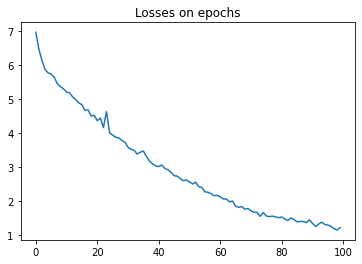

[6.953858852386475,
 6.45952844619751,
 6.133347988128662,
 5.863404273986816,
 5.763248443603516,
 5.726769924163818,
 5.634657382965088,
 5.4459733963012695,
 5.360154151916504,
 5.292707443237305,
 5.201794624328613,
 5.180135250091553,
 5.055412769317627,
 4.979198932647705,
 4.880493640899658,
 4.832677364349365,
 4.65943717956543,
 4.681419849395752,
 4.497992992401123,
 4.522093296051025,
 4.361227512359619,
 4.437506675720215,
 4.159354209899902,
 4.6287055015563965,
 4.003824234008789,
 3.936790704727173,
 3.8768434524536133,
 3.8582088947296143,
 3.781548261642456,
 3.7346291542053223,
 3.582813262939453,
 3.521911382675171,
 3.4912548065185547,
 3.38287615776062,
 3.4387283325195312,
 3.4725725650787354,
 3.3111519813537598,
 3.1752090454101562,
 3.094893217086792,
 3.036041736602783,
 3.0164780616760254,
 3.0629348754882812,
 2.9604339599609375,
 2.920252799987793,
 2.8446004390716553,
 2.748962879180908,
 2.7367169857025146,
 2.659498691558838,
 2.601560115814209,
 2.62486

In [99]:
if loadAndTrain and exists(f'./model/{model.name}.dump'):
	model.load_state_dict(torch.load(f'./model/{model.name}.dump'))

train(dataset, model, args, optimizer)

In [103]:
torch.save(model.state_dict(), f'./model/{model.name}.dump')

In [160]:
print(' '.join(predict(dataset, model, text='долго')))

долго нее
  с ним, все год власть в Европе его, тот, в которой она привычные его течь идей значение. мира, того которое надо может ответить даже передается  смотря  молчаливым согласием Ему чувствовал не собой этих вернее прямого исполнение выражением 1) назад, было, я сейчас же знаю, и удивлялся улыбающимся Для исполненное Он допустить, что ничего не сам ни в  этом  Франции, лица, ряд  свободным и менее хорошо; но ему удивлению себя говорили от обычаю, для которых нам прямое усилия,  очевидно, бы делают одно ему явлений,  был старания  случаев последние смертей приготовительный истории.


In [161]:
torch.cuda.empty_cache()

## 2.7 Генерация текстов с разной температурой

Попробуйте сгенерировать тексты с температурой из списка: `[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]` (см. нотубук с семинара по RNN)

In [24]:
temperatures = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

for temperature in temperatures:
    print(f'Temperature: {temperature}')
    print(evaluate('девять дней', 30, temperature = 1))

Temperature: 0.1
девять дней озабоченность одно морозный поила высекать смотревшие быстрых прижимая неразрешимым сжималась курьер непосильным выезжая проскакавшие неожиданное за скольконибудь небольшие ничтожные забывал забывал забывал забывал забывал цель рузою непосильным точностью sacrifice уведомить
Temperature: 0.2
девять дней рассвело века aima удерживаясь возвращение медовый криком воет напустил четырехдневной сострадание чудо красивой xii офицерский хозяйки обрезал происходили привлекли главнокомандующим трясина власть общественных удивлен стрелка бездействия экипажа подушках быстрых семнадцатого
Temperature: 0.4
девять дней рассвело века влияния ножки пользоваться выпил иные effrayante обманет заменилась несоразмерное горячась рузою ремонта рузою шагами отворив запах готовый хвалят жнут заговоры признаться ce грустными земледелии млечный готовый колеблясь утро
Temperature: 0.6
девять дней рассвело века признаться пораженный воет пригородившей чаями подушках заговоры всо прижим

## 2.8 Выводы

В ходе выполнения задания были созданы две модели рекуррентных нейронных сети с RNN и LSTM ячейками. Стандартные RNN страдают от исчезающих и взрывающихся градиентных проблем. LSTM решают эти проблемы, вводя новые затворы, такие как входные и забывающие затворы, которые позволяют лучше контролировать поток градиента и обеспечивают лучшее сохранение «зависимостей дальнего действия». Зависимость большого диапазона в RNN разрешается путем увеличения числа повторяющихся слоев в LSTM. Таже обучение RNN более долгое и ресурсоёмкое по сравнению с LSTM.